## Importing

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# import data data
orders = pd.read_csv("orders_clean.csv", parse_dates = ["created_at"])

# Ill switch the variable taken for no taken in order to evaluate how good a model predicts no taken orders
orders['ind_no_taken'] = 1 - orders.taken
orders['ind_store_no_taken_L1H'] = orders.store_notaken_L1H

## Some graphs and numbers

In [3]:
# no taken orders
orders.ind_no_taken.value_counts()

0    135396
1     11531
Name: ind_no_taken, dtype: int64

#### to user distance

Text(0.5,1,'Density: to user distance')

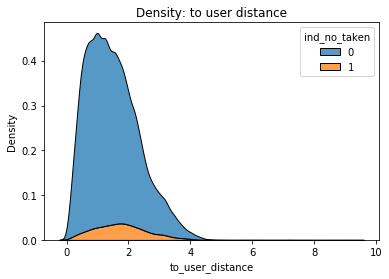

In [4]:
# to user distance density
sns.kdeplot(data=orders, x="to_user_distance", hue="ind_no_taken", multiple="stack"
           ).set_title('Density: to user distance')

In [5]:
# median values, as there are many extrem values
orders[["ind_no_taken", "to_user_distance"]].groupby("ind_no_taken").median("to_user_distance")

,to_user_distance
ind_no_taken,
0,1.362619
1,1.711615


In [6]:
# Not taken orders are related with larger distances

#### to user elevation

Text(0.5,1,'Density: to user elevation')

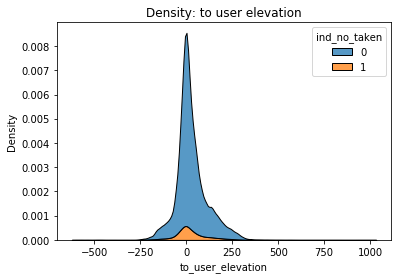

In [7]:
# to user elevation density
sns.kdeplot(data=orders, x="to_user_elevation", hue="ind_no_taken", multiple="stack"
           ).set_title('Density: to user elevation')

In [8]:
# median values, as there are many extrem values
orders[["ind_no_taken", "to_user_elevation"]].groupby("ind_no_taken").median("to_user_elevation")

,to_user_elevation
ind_no_taken,
0,11.340210
1,8.934692


In [9]:
# This variable dos not seems helpful
# I would have expected not taken orders to be related with greater values of to user elevation

#### total earning

Text(0.5,1,'Density: total earning')

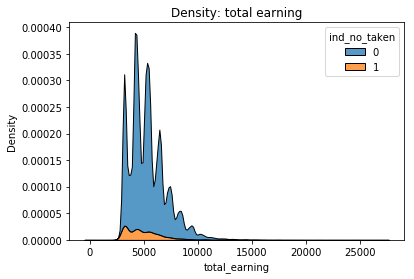

In [10]:
# total earning density
sns.kdeplot(data=orders, x="total_earning", hue="ind_no_taken", multiple="stack"
           ).set_title('Density: total earning')

In [11]:
# median values, as there are many extrem values
orders[["ind_no_taken", "total_earning"]].groupby("ind_no_taken").median("total_earning")

,total_earning
ind_no_taken,
0,5200
1,4700


In [12]:
# Not taken orders are related with smaller earnign orders

#### store orders in last 1h

Text(0.5,1,'Density: store orders in last 1 hr')

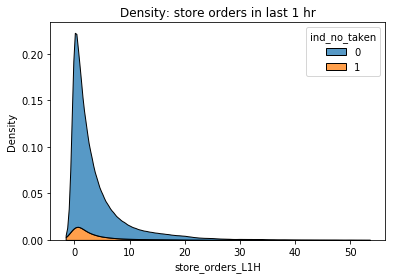

In [13]:
# store orders in last 1hr density
sns.kdeplot(data=orders, x="store_orders_L1H", hue="ind_no_taken", multiple="stack"
           ).set_title('Density: store orders in last 1 hr')

In [14]:
# median values, as there are many extrem values
orders[["ind_no_taken", "store_orders_L1H"]].groupby("ind_no_taken").median("store_orders_L1H")

,store_orders_L1H
ind_no_taken,
0,2
1,2


In [15]:
# There is not any ralation between not taken orders and the amount od orders of the restaurant in the last 1hr

#### indicator of the store having a non taken order during the last 1hr

In [16]:
# median values, as there are many extrem values
total = orders[["ind_store_no_taken_L1H", "ind_no_taken"]
              ].groupby("ind_store_no_taken_L1H"
                       ).count(
                              ).reset_index(
                                            ).rename(columns={'ind_no_taken':'total'})

notaken = orders[["ind_store_no_taken_L1H", "ind_no_taken"]
                ].groupby("ind_store_no_taken_L1H"
                         ).sum(
                              ).reset_index(
                                            ).rename(columns={'ind_no_taken':'no_taken'})

ind_store_no_taken_L1H_prop = pd.merge(total, notaken, on = "ind_store_no_taken_L1H")
ind_store_no_taken_L1H_prop['prop'] = ind_store_no_taken_L1H_prop.no_taken/ind_store_no_taken_L1H_prop.total

In [17]:
ind_store_no_taken_L1H_prop

,ind_store_no_taken_L1H,total,no_taken,prop
0,0,121784,7942,0.065214
1,1,25143,3589,0.142744


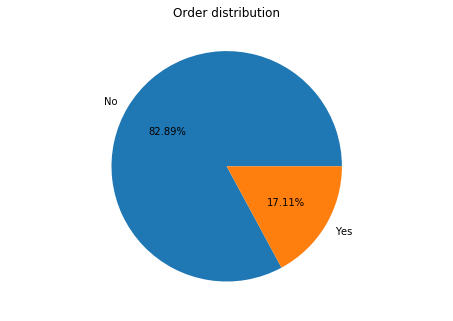

In [18]:
# check the distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(ind_store_no_taken_L1H_prop.total/sum(ind_store_no_taken_L1H_prop.total), labels = ['No', 'Yes'], autopct='%1.2f%%')
plt.title("Order distribution")
plt.show()

In [19]:
# The event of existing any not taken order from the restaurant in the previous 1hr
# is related with a higher proporiton of current no taken orders

#### week day 

In [20]:
# median values, as there are many extrem values
total = orders[["week_day", "ind_no_taken"]
              ].groupby("week_day"
                       ).count(
                              ).reset_index(
                                            ).rename(columns={'ind_no_taken':'total'})

notaken = orders[["week_day", "ind_no_taken"]
                ].groupby("week_day"
                         ).sum(
                              ).reset_index(
                                            ).rename(columns={'ind_no_taken':'no_taken'})

week_day_prop = pd.merge(total, notaken, on = "week_day")
week_day_prop['prop'] = week_day_prop.no_taken/week_day_prop.total

In [21]:
week_day_prop

,week_day,total,no_taken,prop
0,0,15014,1323,0.088118
1,1,21104,1576,0.074678
2,2,18652,1296,0.069483
3,3,16373,1463,0.089354
4,4,21233,1876,0.088353
5,5,24816,2559,0.103119
6,6,29735,1438,0.048361


Text(0.5,1,'Not taken proportion by week day')

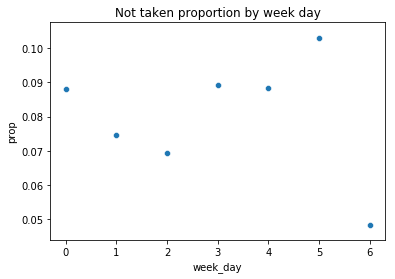

In [22]:
# plot week day
sns.scatterplot(x="week_day", y="prop",data=week_day_prop).set_title('Not taken proportion by week day')

Text(0.5,1,'Total orders by week day')

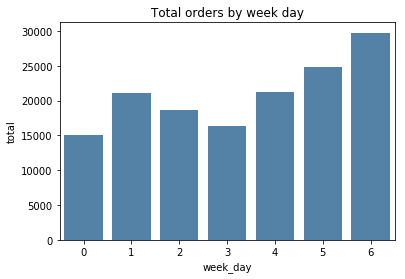

In [23]:
# plot week day
sns.barplot(x="week_day", y="total",data=week_day_prop, color = "steelblue").set_title('Total orders by week day')

In [24]:
# Day of the week with the most proporiton of no taken orders is saturday
# it is the second day that has the most orders

#### hour of day

In [25]:
# median values, as there are many extrem values
total = orders[["hour", "ind_no_taken"]
              ].groupby("hour"
                       ).count(
                              ).reset_index(
                                            ).rename(columns={'ind_no_taken':'total'})

notaken = orders[["hour", "ind_no_taken"]
                ].groupby("hour"
                         ).sum(
                              ).reset_index(
                                            ).rename(columns={'ind_no_taken':'no_taken'})

hour_prop = pd.merge(total, notaken, on = "hour")
hour_prop['prop'] = hour_prop.no_taken/hour_prop.total

In [26]:
hour_prop

,hour,total,no_taken,prop
0,0,456,76,0.166667
1,1,305,87,0.285246
2,2,160,51,0.318750
3,3,125,43,0.344000
4,4,80,30,0.375000
5,5,34,17,0.500000
6,6,134,18,0.134328
7,7,887,41,0.046223
8,8,1764,69,0.039116
9,9,2378,100,0.042052


Text(0.5,1,'Not taken proportion by hour')

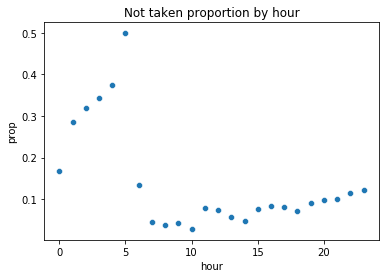

In [27]:
# plot hour
sns.scatterplot(x="hour", y="prop",data=hour_prop).set_title('Not taken proportion by hour')

Text(0.5,1,'Total orders by hour')

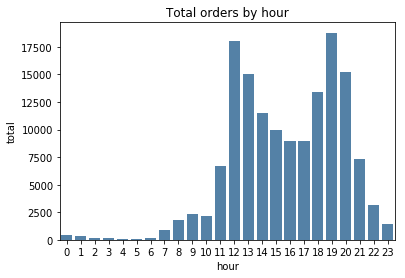

In [28]:
# plot hour
sns.barplot(x="hour", y="total",data=hour_prop, color = "steelblue").set_title('Total orders by hour')

In [29]:
# Time of the day with the most proporiton of no taken orders is before 5 am, however it is the time of 
# the day with the lowest amount of orders

In [30]:
# Based on findings from this script 

# Variabels to include
# to_user_distance
# total_earning
# ind_store_no_taken_L1H
# week_day

# Variables to exclude
# to_user_elevation
# store_orders_L1H
# hour